https://twitter.com/dannchu/status/1443524638252810248

  0.052157 seconds (133.01 k allocations: 8.288 MiB, 64.40% compilation time)
  0.030704 seconds
  0.048641 seconds
  0.058015 seconds
  0.072462 seconds
  0.087227 seconds
  0.101040 seconds
  0.114205 seconds
  0.125177 seconds
  0.134832 seconds


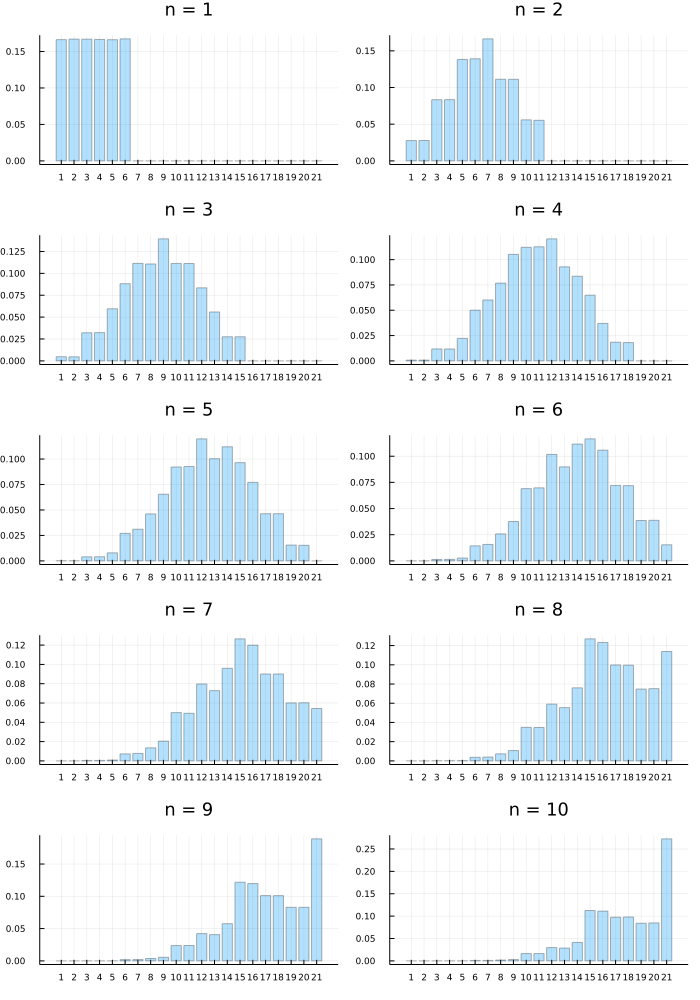

In [1]:
using Plots
default(titlefontsize=12, tickfontsize=6)

function f!(a, n)
    a .= false
    s = 0
    for _ in 1:n
        i = rand(1:6)
        a[i] && continue
        a[i] = true
        s += i
        all(a) && break
    end
    s
end

function countf!(X, a, n, L)
    X .= 0
    for _ in 1:L
        @inbounds X[f!(a, n)] +=1
    end
    X
end

X = zeros(Int, 21)
a = falses(6)
L = 10^6
PP = []
for n in 1:10
    @time countf!(X, a, n, L); flush(stdout)
    P = bar(1:21, X/L; alpha=0.3, xtick=1:21, label="", title="n = $n")
    push!(PP, P)
end
plot(PP...; layout=(5, 2), size=(700, 1000))